<a href="https://colab.research.google.com/github/JimQuejado/Emerging-Technology-2---FInal-Project-QUEJADO-SERRANO/blob/main/12.%20Assignment_9_1_Convolutional_Neural_Network_QUEJADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPE019 : Assignment 9.1 : Convolutional Neural Network**


---


**Name:** QUEJADO,  Jimlord M. <br>
**Course and Section:** CPE019-CPE32S3 <br>
**Date of Submission**: April 27, 2024<br>
**Instructor:** Engr. Roman Richard<br>

---




# **About the data**

The data is about Broken Eggs. The data contains 3 classes, 0 for cracked egg, 1 for empty (no eggs) and 2 for good or no cracks. The images were taken with a raspberry pi and a Logitech webcam. The data set is already split in half with testing and training data set. Training data set has 190 instance each classes.


---



##**Subject Area**
- Food

##**Associated Tasks**
- Classification

##**Feature Type**
- Image

##**# Instances**
- 567

##**# Features**
- 3



---


##  **Link to data set:**
https://www.kaggle.com/datasets/frankpereny/broken-eggs



## Preparing the Data

In this section, I used `flow_from_directory `in order to load the images properly. The `flow_from_directory` is from keras prerprocessing that is used to load the images that will be passed later for the `ImageDataGenerator`[1]. I also used the `ImageDataGenerator` inorder to do the basic image preprocessing which is a basic rescaling[2]. This will later be again used in the latter part of the activity


---

Reference used:

[1] "tf.keras.preprocessing.image.ImageDataGenerator," TensorFlow. [Online]. Available: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory. [Accessed: Apr. 26, 2024].

[2] R. Ruffinengo, "Easy explanation of CNNs for image classification," YouTube, May 13, 2020. [Video file]. Available: https://www.youtube.com/watch?v=IOjdX36S9_4. [Accessed: Apr. 26, 2024].



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Unzipping the data**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Datasets/Egg.zip", "r")
zip_ref.extractall("/content/dataset")
zip_ref.close()

#### **Remarks:**





The data was unzipped in the file so that it will be laoded to the local directory of google collab for faster processing [3].



#### Reference used:



[3] TechExplained, "Understanding AI Algorithms," YouTube, 10 Apr. 2021. [Video file]. Available: https://www.youtube.com/watch?v=CIy7QQxlDLE. [Accessed: 12-Apr-2024].


### **Image Preprocessing**



In [ ]:
traindatagen = ImageDataGenerator(rescale = 1./255) # for image scaling

In [ ]:
valdatagen = ImageDataGenerator(rescale=1./255)

#### **Remarks:**



A simple rescaling was done in this section for both training and validation data set.

### **Loading the data**

In [ ]:
train_dir = "/content/dataset/Egg/train"
train_data = traindatagen.flow_from_directory(directory = train_dir,
                                              class_mode = 'categorical',
                                              batch_size=9,
                                              target_size = (150,150),
                                              shuffle=True,
                                              seed=32
                                              )

Found 542 images belonging to 3 classes.


In [ ]:
#Validation

val_dir = "/content/dataset/Egg/test"
val_data = valdatagen.flow_from_directory(
    directory=val_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical'
)

Found 27 images belonging to 3 classes.


#### **Remarks:**



as in the results, it successfully identified there are 3 classes and 542 images in the training data set and 27 on the validation data set

Reference used for the code

[4] J. Brownlee, "How to Load Large Datasets from Directories for Deep Learning with Keras," Machine Learning Mastery, 15 Jan. 2019. [Online]. Available: https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/. [Accessed: 10-Apr-2024].



### **Visualization**

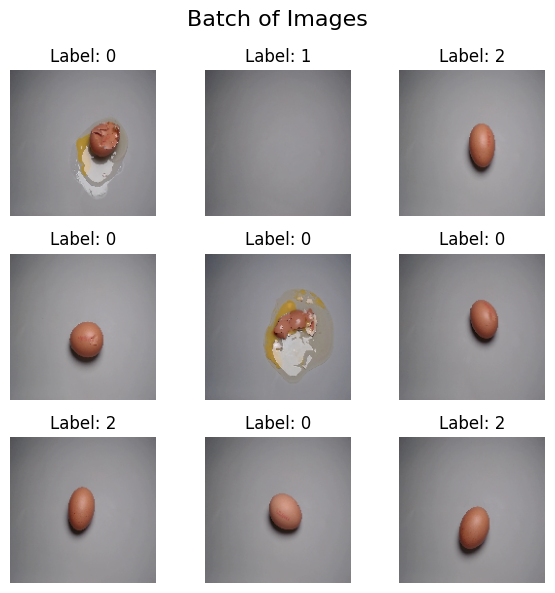

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(train_data)

fig, ax = plt.subplots(3, 3, figsize=(6, 6))
fig.suptitle('Batch of Images', fontsize=16)
ax = ax.ravel()

for i in range(9):
    ax[i].imshow(images[i])
    ax[i].set_title(f'Label: {labels[i].argmax()}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()


#### **Remarks:**



 Label 0 is for no cracks, lavel 1 for empty, label 2 for cracked.

## **Creating a Base Line Model**




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
def baseline_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = baseline_model()

In [ ]:
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=10,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size
)

Epoch 1/10
33/33 [==============================] - 5s 81ms/step - loss: 8.3117 - accuracy: 0.3593 - val_loss: 1.1113 - val_accuracy: 0.2500
Epoch 2/10
33/33 [==============================] - 3s 91ms/step - loss: 0.9126 - accuracy: 0.6179 - val_loss: 0.6617 - val_accuracy: 0.8125
Epoch 3/10
33/33 [==============================] - 2s 68ms/step - loss: 0.5745 - accuracy: 0.8422 - val_loss: 0.5868 - val_accuracy: 0.7500
Epoch 4/10
33/33 [==============================] - 3s 95ms/step - loss: 0.3468 - accuracy: 0.8764 - val_loss: 0.6483 - val_accuracy: 0.8750
Epoch 5/10
33/33 [==============================] - 3s 79ms/step - loss: 0.2905 - accuracy: 0.8916 - val_loss: 0.3853 - val_accuracy: 0.8750
Epoch 6/10
33/33 [==============================] - 2s 69ms/step - loss: 0.2586 - accuracy: 0.8973 - val_loss: 0.4246 - val_accuracy: 0.8750
Epoch 7/10
33/33 [==============================] - 2s 70ms/step - loss: 0.2538 - accuracy: 0.8992 - val_loss: 0.0974 - val_accuracy: 1.0000
Epoch 8/10
33

Refernce used for the code:

[5] "Keras split train/test set when using ImageDataGenerator," Stack Overflow, 24 Feb. 2017. [Online]. Available: https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator. [Accessed: 27-Apr-2024].


In [ ]:
import numpy as np

# Example metrics
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Calculate mean and standard deviation for each
loss_mean = np.mean(loss)
val_loss_mean = np.mean(val_loss)


accuracy_mean = np.mean(accuracy)
val_accuracy_mean = np.mean(val_accuracy)


# Print the results
print(f"Training Loss: Mean = {loss_mean}")
print(f"Validation Loss: Mean = {val_loss_mean}\n")
print(f"Training Accuracy: Mean = {accuracy_mean}")
print(f"Validation Accuracy: Mean = {val_accuracy_mean}")

Training Loss: Mean = 1.1599461033940315
Validation Loss: Mean = 0.5267603121697902

Training Accuracy: Mean = 0.8079847961664199
Validation Accuracy: Mean = 0.8


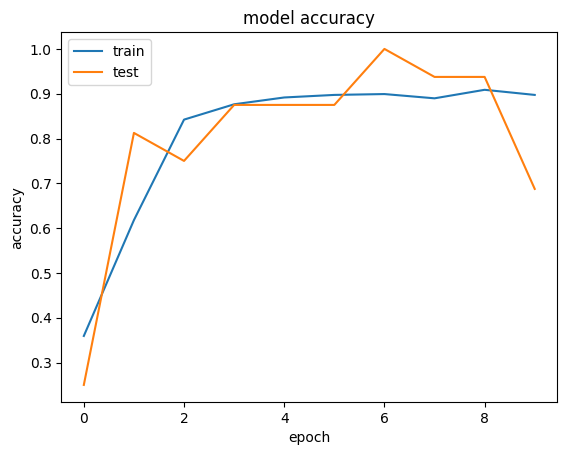

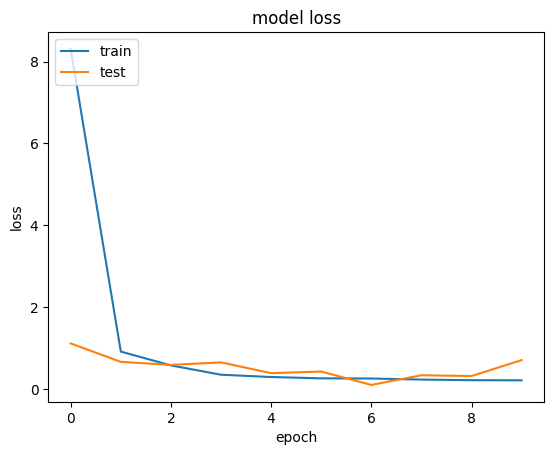

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### **Remarks:**




After the training it can be seen that the model is faced with a new data is performing unstable and not learning properly. To further enhance this, iamge augmentations, standardization, ZCA whitening, and adding more complexity to the model can help in improving its performance

## **Performing Image Augmentation, standardazions and ZCA whitening**



### **Point of comparison**



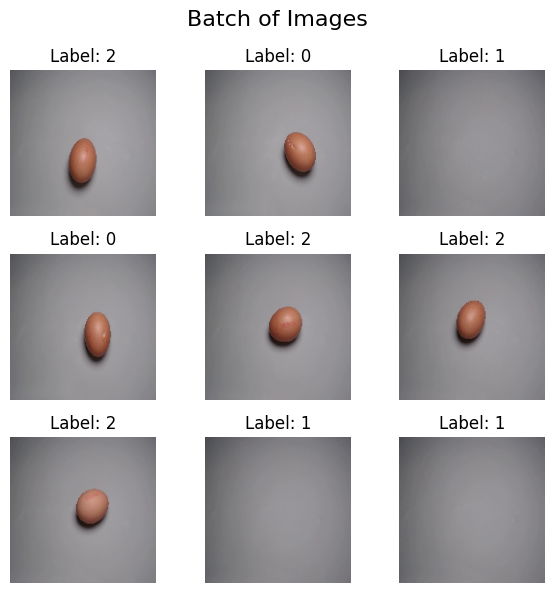

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(train_data)

fig, ax = plt.subplots(3, 3, figsize=(6, 6))
fig.suptitle('Batch of Images', fontsize=16)
ax = ax.ravel()

for i in range(9):
    ax[i].imshow(images[i])
    ax[i].set_title(f'Label: {labels[i].argmax()}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()


### **Augmentation**

In [ ]:
#Image Augmentation
traindatagen2 = ImageDataGenerator(rescale = 1./255,
                                  #image augmentation
                                  rotation_range = 20, #random rotation
                                  zoom_range =0.4,

                                  #random shifts
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,

                                  #random Flips
                                  horizontal_flip =True,
                                  vertical_flip = True,


                                  )

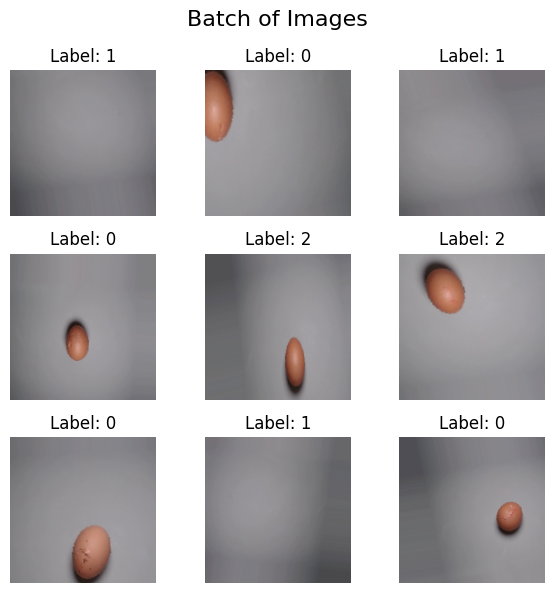

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[i*3+j], cmap=plt.get_cmap("gray"))
# show the plot
plt.show()


#### **Remarks:**



As shown above, the images are augmented in such way that it is flipped, zoomed, and shifted. Comparing it to the original image, it can be seen that the image was successfully agumented as it was slightly widened, rotated and zoomed compared to the original images.

### **Feature scaling**

Inorder to perform feature scaling, we must first compute the necessary statistics for it to work, to do this, we converted the images into a numpy array.


References for the code:

[6] S. Rajaa, "Scaling, Normalizing, Standardizing," Medium, no date provided. [Online]. Available: https://medium.com/@shangethrajaa/scaling-normalizing-standardizing-2a446fa063dd. [Accessed: 27-Apr-2024].


[7] "How do you read images into a classifier by folder name instead of file name?" Stack Overflow, 30 Apr. 2018. [Online]. Available: https://stackoverflow.com/questions/50019928/how-do-you-read-images-into-a-classifier-by-folder-name-instead-of-file-name. [Accessed: 27-Apr-2024].


In [ ]:
import os
from PIL import Image
import numpy as np

def load_images_and_labels(base_folder, target_size=(64, 64), max_samples=200):
    images = []
    labels = []
    class_labels = sorted(os.listdir(base_folder))
    label_dict = {name: idx for idx, name in enumerate(class_labels)}


    num_classes = len(class_labels)
    max_samples_per_class = max_samples // num_classes

    for class_name in class_labels:
        class_folder = os.path.join(base_folder, class_name)
        samples_collected = 0

        for filename in os.listdir(class_folder):
            if samples_collected < max_samples_per_class:
                img_path = os.path.join(class_folder, filename)
                try:
                    with Image.open(img_path) as img:
                        img = img.convert('RGB')
                        img = img.resize(target_size)
                        images.append(np.array(img))
                        labels.append(label_dict[class_name])
                        samples_collected += 1
                except IOError:
                    print('Error processing image:', img_path)
            else:
                break

    images = np.array(images)
    labels = np.array(labels)
    return images, labels


In [ ]:
base_folder = '/content/dataset/Egg/train'
X_train, y_train = load_images_and_labels(base_folder, target_size=(64, 64))
print("Loaded images shape:", X_train.shape)
print("Loaded labels shape:", y_train.shape)



Loaded images shape: (198, 64, 64, 3)
Loaded labels shape: (198,)


In [ ]:
X_train1 = X_train.astype('float32')

In [ ]:
#Feature scaling
traindatagen3 = ImageDataGenerator(
                                  #Feature Standardization
                                  featurewise_center=True,
                                  featurewise_std_normalization=True,


                                  )

In [ ]:
traindatagen3.fit(X_train1)

-6.2795343 0.043519154 5.768882


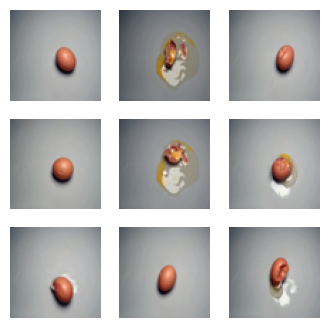

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#fornormalization
def normalize_image(x):
    x_min = np.min(x)
    x_max = np.max(x)
    return (x - x_min) / (x_max - x_min)

for X_batch, y_batch in traindatagen3.flow(X_train1, y_train, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())

    # Create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))

    for i in range(3):
        for j in range(3):
            # Normalize image data
            img_index = i*3+j
            img_normalized = normalize_image(X_batch[img_index])

            if img_normalized.shape[-1] == 3:
                ax[i][j].imshow(img_normalized)
            else:
                ax[i][j].imshow(img_normalized, cmap='gray')



    plt.show()
    break


#### **Remarks:**



The images were slight altered in the image as it undergone normalization. Additionally, I had to make the input size lower as my hardware cannot handle large images when fitting resulting sometimes to my google collab crashing.

### **ZCA whitening**

In [ ]:
#ZCA Whitening
traindatagen4 = ImageDataGenerator( zca_whitening=True,rescale = 1./255)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1444: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(


In [ ]:
X_train2 = X_train.astype('float32')
traindatagen4.mean = X_train2.mean(axis=0)
traindatagen4.std = X_train2.std(axis=0)

In [ ]:
traindatagen4.fit(X_train2)

-1.8893095 -0.00020628933 1.5630488


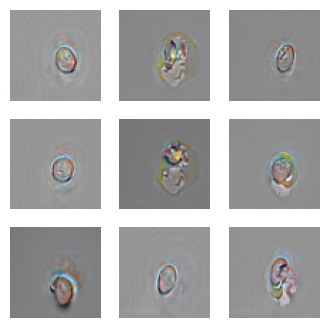

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#fornormalization
def normalize_image(x):
    x_min = np.min(x)
    x_max = np.max(x)
    return (x - x_min) / (x_max - x_min)

for X_batch, y_batch in traindatagen4.flow(X_train2, y_train, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())

    # Create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))

    for i in range(3):
        for j in range(3):
            # Normalize image data
            img_index = i*3+j
            img_normalized = normalize_image(X_batch[img_index])

            if img_normalized.shape[-1] == 3:
                ax[i][j].imshow(img_normalized)
            else:
                ax[i][j].imshow(img_normalized, cmap='gray')

    plt.show()
    break


#### **Remarks:**




In this section, I seperated the zca whitening and the feature standardization. The reason behind it is that it both alters the pixel value of the data set. Thus, applying both may cause issues in the data set itself and affect model's performance




#### Reference used in the code:



[8] J. Brownlee, "Image Augmentation for Deep Learning With Keras," Machine Learning Mastery. [Online]. Available: https://machinelearningmastery.com/image-augmentation-deep-learning-keras/. [Accessed: 27-Apr-2024].



## **Save augmented image data to disk**

References used:

[9] "How to save augmented images using ImageDataGenerator and flow from directory in Keras?" Stack Overflow, 22 Jul. 2021. [Online]. Available: https://stackoverflow.com/questions/68505932/how-to-save-augmented-images-using-imagedatagenerator-and-flow-from-directory-in. [Accessed: 27-Apr-2024].


[10] P. Varma, "Issue #1: ImageAugmentationTypes repository," GitHub, no specific date provided. [Online]. Available: https://github.com/Prasad9/ImageAugmentationTypes/issues/1. [Accessed: 27-Apr-2024].


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1444: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(


-1.8893095 -0.00020628933 1.5630488


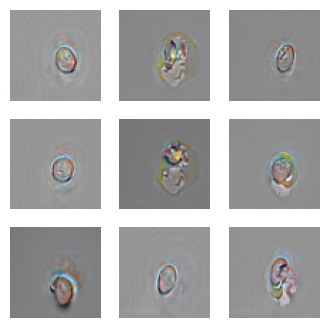

In [ ]:
#ZCA Whitening

traindatagen5 = ImageDataGenerator( zca_whitening=True,rescale = 1./255)

X_train3 = X_train.astype('float32')
traindatagen4.mean = X_train3.mean(axis=0)
traindatagen4.std = X_train3.std(axis=0)

traindatagen5.fit(X_train3)

#fornormalization
def normalize_image(x):
    x_min = np.min(x)
    x_max = np.max(x)
    return (x - x_min) / (x_max - x_min)
#saving the model
for X_batch, y_batch in traindatagen5.flow(X_train3, y_train, batch_size=9, shuffle=False,
                                     save_to_dir='/content/Augmented_Images', save_prefix='aug', save_format='png'):


    print(X_batch.min(), X_batch.mean(), X_batch.max())

    # Create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))

    for i in range(3):
        for j in range(3):
            # Normalize image data
            img_index = i*3+j
            img_normalized = normalize_image(X_batch[img_index])

            if img_normalized.shape[-1] == 3:
                ax[i][j].imshow(img_normalized)
            else:  #
                ax[i][j].imshow(img_normalized, cmap='gray')

    plt.show()
    break

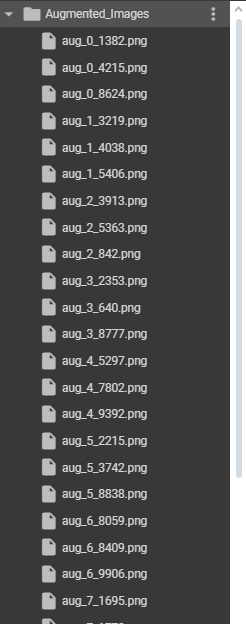

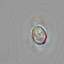

In [ ]:
from PIL import Image
from IPython.display import display

# Load the image file
img = Image.open('/content/Augmented_Images/aug_0_1382.png')

# Display the image
display(img)


#### **Remarks:**



In this section, I was able to successfully save the augmented image of ZCA whitening. I was not able to save everything again due to my hardware limits but nevertheless, I was able to save around 200 augmented images as shown above

## **Develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task**


### **Transforming data to numpy array**

In [ ]:
#transforming data to numpy array

def load_images_and_labels(base_folder, target_size=(64, 64)):
    images = []
    labels = []
    class_labels = sorted(os.listdir(base_folder))
    label_dict = {name: idx for idx, name in enumerate(class_labels)}

    for class_name in class_labels:
        class_folder = os.path.join(base_folder, class_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            try:
                with Image.open(img_path) as img:
                    img = img.convert('RGB')
                    img = img.resize(target_size)
                    images.append(np.array(img))
                    labels.append(label_dict[class_name])
            except IOError:
                print('Error processing image:', img_path)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels


### **Loading the data**

In [ ]:
from tensorflow.keras.utils import to_categorical
# load train and test dataset
def load_dataset():
	# load dataset

  #training
  base_folder = '/content/dataset/Egg/train'

  trainX, trainY = load_images_and_labels(base_folder, target_size=(28, 28))

  #testing

  test_folder = '/content/dataset/Egg/test'

  testX, testY = load_images_and_labels(test_folder, target_size=(28, 28))

  trainY = to_categorical(trainY)
  testY = to_categorical(testY)

  return trainX, trainY, testX, testY

### **Scaling each pixels**

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

### **Creating the model**

In [ ]:
# define cnn model
def define_model():
	model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

### **Evaluation Diagnostics**

In [ ]:
import matplotlib.pyplot as plt
import sys


# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	plt.savefig(filename + '_plot.png')
	plt.close()

###  **Running the test harness**

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=20, batch_size=32, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

### **Evaluation**

In [ ]:
import time
start_time = time.time()
from tensorflow.keras.optimizers import SGD
# entry point, run the test harness
run_test_harness()

end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time, "seconds")

> 74.074
Total time taken: 74.70144701004028 seconds


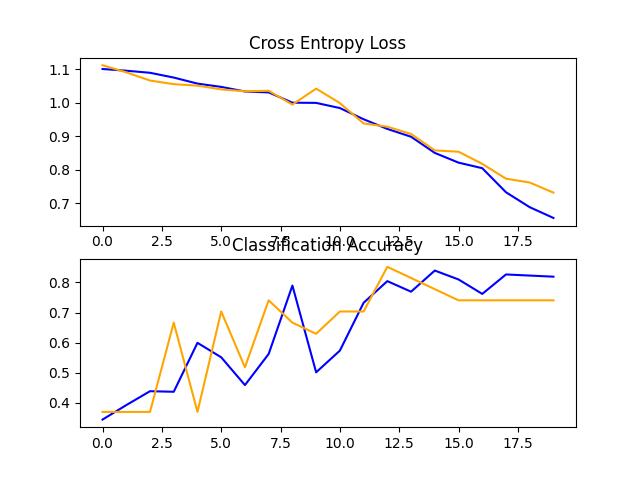

In [ ]:
from PIL import Image
from IPython.display import display

# Load the image file
img = Image.open('/content/colab_kernel_launcher.py_plot.png')

# Display the image
display(img)

### **Remarks:**



My computer cannot perform higher input size or target size as it crashes the google collab. This may result to poor model performance as it reduces the quality of the images that can hinder the model's learning.

## **Explore extensions to a baseline model to improve learning and model capacity.**


In [ ]:
from tensorflow.keras.utils import to_categorical

#transforming data to numpy array

def load_images_and_labels(base_folder, target_size=(28, 28)):
    images = []
    labels = []
    class_labels = sorted(os.listdir(base_folder))
    label_dict = {name: idx for idx, name in enumerate(class_labels)}

    for class_name in class_labels:
        class_folder = os.path.join(base_folder, class_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            try:
                with Image.open(img_path) as img:
                    img = img.convert('RGB')
                    img = img.resize(target_size)
                    images.append(np.array(img))
                    labels.append(label_dict[class_name])
            except IOError:
                print('Error processing image:', img_path)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels


# load train and test dataset
def load_dataset():
	# load dataset

  #training
  base_folder = '/content/dataset/Egg/train'

  trainX, trainY = load_images_and_labels(base_folder, target_size=(28, 28))

  #testing

  test_folder = '/content/dataset/Egg/test'

  testX, testY = load_images_and_labels(test_folder, target_size=(28, 28))

  trainY = to_categorical(trainY)
  testY = to_categorical(testY)

  return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm


### **Modifying the model architecture**

In [ ]:
# define cnn model
def define_model():
	model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')
    ])
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
import matplotlib.pyplot as plt
import sys


# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	plt.legend()
  # plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	plt.legend()
  # save plot to file
	filename = sys.argv[0].split('/')[-1]
	plt.savefig(filename + '_plot.png')
	plt.close()




###  **Adding a data generator**

In [ ]:
 # run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=32)
	# fit model
	steps = int(trainX.shape[0] / 32)
	history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=200, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

### **Running the Model**

In [ ]:
import time
start_time = time.time()
from tensorflow.keras.optimizers import SGD
# entry point, run the test harness
run_test_harness()

end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time, "seconds")

<ipython-input-171-fd3a44f6bfff>:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=200, validation_data=(testX, testY), verbose=0)


> 77.778
Total time taken: 225.23508954048157 seconds


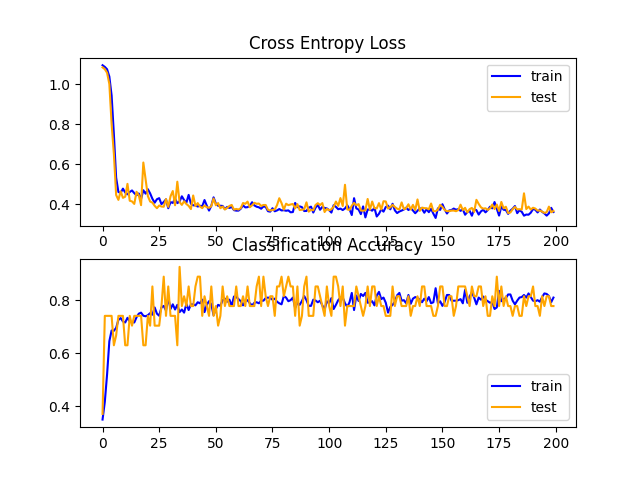

In [ ]:
from PIL import Image
from IPython.display import display

# Load the image file
img = Image.open('/content/colab_kernel_launcher.py_plot.png')

# Display the image
display(img)

### **Remarks:**





In this section, I was able to modify the model architecture, apply different learning rates, and addign some imagegenerator filters in order to achieve a better result compared to my previous model created. As shown in the test, it is still not that performing well and very unstable but with further fine tuning, it can still be cleaned better. I was not able to do this as I compressed the input size of the images losing a lot of features especiall on the slightly cracked eggs.

## **Finalized model**

### **Evaluating and Saving the final model**

In [ ]:
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys

#transforming data to numpy array

def load_images_and_labels(base_folder, target_size=(28, 28)):
    images = []
    labels = []
    class_labels = sorted(os.listdir(base_folder))
    label_dict = {name: idx for idx, name in enumerate(class_labels)}

    for class_name in class_labels:
        class_folder = os.path.join(base_folder, class_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            try:
                with Image.open(img_path) as img:
                    img = img.convert('RGB')
                    img = img.resize(target_size)
                    images.append(np.array(img))
                    labels.append(label_dict[class_name])
            except IOError:
                print('Error processing image:', img_path)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels


# load train and test dataset
def load_dataset():
	# load dataset

  #training
  base_folder = '/content/dataset/Egg/train'

  trainX, trainY = load_images_and_labels(base_folder, target_size=(28, 28))

  #testing

  test_folder = '/content/dataset/Egg/test'

  testX, testY = load_images_and_labels(test_folder, target_size=(28, 28))

  trainY = to_categorical(trainY)
  testY = to_categorical(testY)

  return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm


# define cnn model
def define_model():
	model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')
    ])
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	plt.legend()
  # plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	plt.legend()
  # save plot to file
	filename = sys.argv[0].split('/')[-1]
	plt.savefig(filename + '_plot.png')
	plt.close()


 # run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=32)
	# fit model
	steps = int(trainX.shape[0] / 32)
	history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=200, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
  # save model
	model.save('/content/Model/final_model.h5')

In [ ]:
import time
start_time = time.time()
from tensorflow.keras.optimizers import SGD

# entry point, run the test harness
run_test_harness()

end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time, "seconds")

<ipython-input-174-09b5a470603f>:115: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=200, validation_data=(testX, testY), verbose=0)


> 81.481
Total time taken: 246.2292251586914 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Remarks:**



In this model that was saved, it has an accuracy of 81.41 %. This is the highest accuracy that I have gotten. But then, this is still inconsistent as shown in the previous graphs due to the lost features on importing and the model was not able to learn it properly.

### **Testing the Prediction**

In [ ]:

# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 28, 28, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

def run_example(path):
  img = load_image(path)
  model = load_model('/content/Model/final_model.h5')
  result = np.argmax(model.predict(img), axis=1)
  return result[0]



#### **Predicting Results Trial 1:**


The following images are expected results:


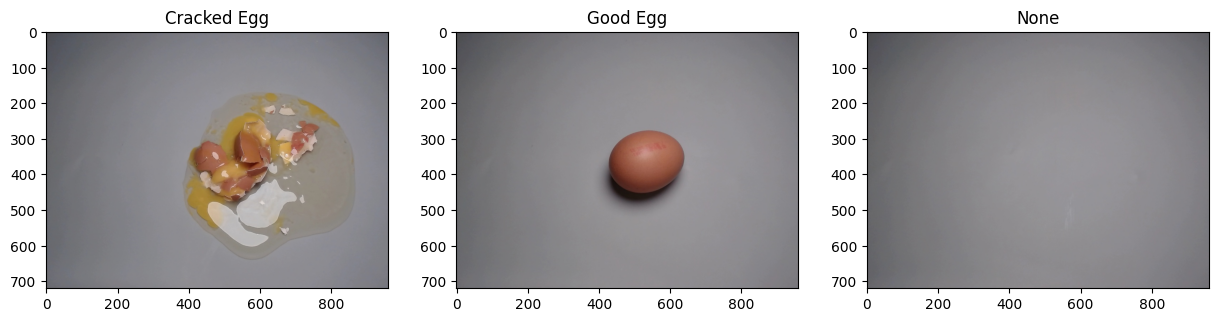

In [ ]:
# Define the paths to the images
cracked = '/content/crack.016066.jpg'
good = '/content/good.265211.jpg'
none = '/content/none.566823.jpg'


cracked_image = Image.open(cracked)
good_image = Image.open(good)
none_image = Image.open(none)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cracked_image)
ax[0].set_title('Cracked Egg')

ax[1].imshow(good_image)
ax[1].set_title('Good Egg')

ax[2].imshow(none_image)
ax[2].set_title('None')

plt.show()


In [ ]:
print("expected: 0")
r = run_example(cracked)
print("Result:", r)


expected: 0
1/1 [==============================] - 0s 163ms/step
result: 0


In [ ]:
print("expected: 1")

r = run_example(none)
print("Result:", r)


expected: 1
1/1 [==============================] - 0s 90ms/step
Result: 1


In [ ]:
print("expected: 2")
x = run_example(good)
print("Result:",x)

expected: 2
1/1 [==============================] - 0s 98ms/step
Result: 2


#### **Predicting Results Trial 2:**

The following images are the expected results:

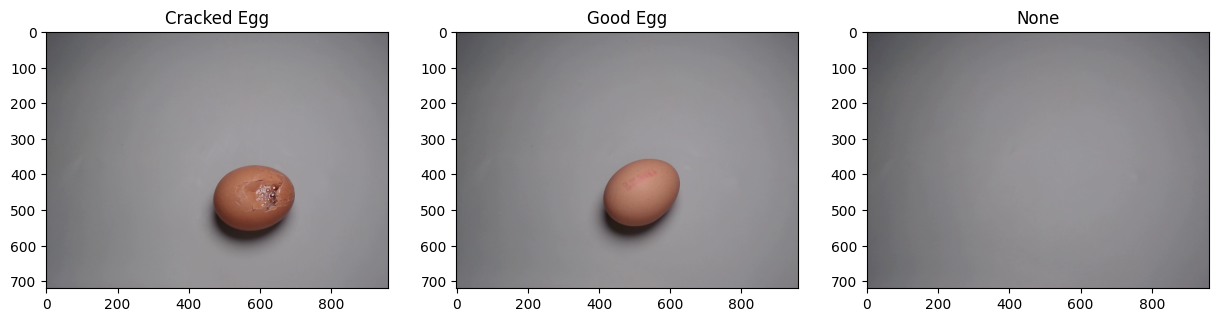

In [ ]:
cracked = '/content/dataset/Egg/test/crack/2023-04-09 21_00_27.517984.jpg'
good = '/content/dataset/Egg/test/good/2023-04-09 20_28_40.850248.jpg'
none = '/content/dataset/Egg/test/empty/2023-04-09 21_22_48.405039.jpg'


cracked_image = Image.open(cracked)
good_image = Image.open(good)
none_image = Image.open(none)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cracked_image)
ax[0].set_title('Cracked Egg')

ax[1].imshow(good_image)
ax[1].set_title('Good Egg')

ax[2].imshow(none_image)
ax[2].set_title('None')

plt.show()


In [ ]:
print("expected: 0")
r = run_example(cracked)
print("Result:", r)


expected: 0
1/1 [==============================] - 0s 98ms/step
Result: 2


In [ ]:
print("expected: 1")

r = run_example(none)
print("Result:", r)


expected: 1
1/1 [==============================] - 0s 97ms/step
Result: 1


In [ ]:
print("expected: 2")
x = run_example(good)
print("Result:",x)

expected: 2
1/1 [==============================] - 0s 95ms/step
Result: 2


### **Remarks:**



As stated earlier, the model will have a hard time in classifying slightly cracked egg as shown in the trial 2. This is because of the lost features while compressing the image. This results to the unstable performance unless the egg is totally cracked in the first trial.

## **Conclusion:**



After conducting the activity I learned and conclude the following:

1. There is a huge difference in importing image dataset compared to csv data sets.

2. The training time and fitting of images takes a lot of time.

3. Compared to the MLP that we previously covered CNN is more applicable for image classification tasks especially in learning the patters as it preserve the spatial structure of the problem.

4. I noticed that the number of neurons per layer in this case increases instead of decreasing compared to MLP

5. Image Augmentation is helpful in improving the robustness of the model

6. Improving the model architecture based on the VGG Block drastically improves the performance of the model. Although I was not able to properly apply it as my laptop crashes when I increase the model complexity.

7. Decreasing the input size or the dimensions of the image when improting causes to lose more important features. In my case, the small cracks are not seen and was categorize to good egg instead of cracked egg.


The activity was challenging in general and was able to pique my interest more about CNN.